<a href="https://colab.research.google.com/github/fakmalpradana/SpatialProgramming/blob/main/geovisual_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geovisual Analisis Sederhana Data Gempa Bumi 

In [ ]:
import folium as fl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline 

Pada library yang digunakan diatas berikut adalah fungsi masing masing pada modul ini :
- folium sebagai plotting basemap dan mengolah analisis spasial
- pandas untuk mengelola data
- matplotlib digunakan sebagai media/canvas untuk visualisasi
- seaborn untuk menampilkan analisis visual
- matplotlib inline digunakan agar output visual yang dikeluarkan akan disimpan di dalam notebook

## Input data

In [ ]:
df = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv")

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-10-30T07:03:09.320Z,-23.681700,-68.6388,115.12,4.20,mb,NaN,79.0,0.84000,0.57,us,us7000fq13,2021-10-30T07:28:34.040Z,"96 km SSW of San Pedro de Atacama, Chile",earthquake,6.90,6.60,0.159,11.0,reviewed,us,us
1,2021-10-30T05:49:13.956Z,-41.432900,-83.3544,10.00,5.10,mb,NaN,195.0,7.42600,0.43,us,us7000fq0p,2021-10-30T06:07:38.040Z,West Chile Rise,earthquake,12.10,2.00,0.072,62.0,reviewed,us,us
2,2021-10-30T05:22:11.300Z,33.208167,-115.5735,2.96,2.46,ml,44.0,64.0,0.04675,0.23,ci,ci39844559,2021-10-30T05:48:02.040Z,"6km SW of Niland, CA",earthquake,0.30,0.61,0.125,27.0,automatic,ci,ci
3,2021-10-30T05:13:18.074Z,-21.163900,-68.6283,138.74,4.20,mb,NaN,52.0,0.81100,0.60,us,us7000fq0g,2021-10-30T05:42:37.040Z,"146 km NNE of Calama, Chile",earthquake,7.50,9.20,0.186,8.0,reviewed,us,us
4,2021-10-30T03:56:44.110Z,18.003000,-66.7676,11.00,2.74,md,16.0,147.0,0.16620,0.08,pr,pr2021303000,2021-10-30T04:33:40.561Z,"1 km S of Magas Arriba, Puerto Rico",earthquake,0.31,0.44,0.430,5.0,reviewed,pr,pr


## Pengecekan data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524 entries, 0 to 1523
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1524 non-null   object 
 1   latitude         1524 non-null   float64
 2   longitude        1524 non-null   float64
 3   depth            1524 non-null   float64
 4   mag              1524 non-null   float64
 5   magType          1524 non-null   object 
 6   nst              450 non-null    float64
 7   gap              1384 non-null   float64
 8   dmin             1287 non-null   float64
 9   rms              1524 non-null   float64
 10  net              1524 non-null   object 
 11  id               1524 non-null   object 
 12  updated          1524 non-null   object 
 13  place            1524 non-null   object 
 14  type             1524 non-null   object 
 15  horizontalError  1368 non-null   float64
 16  depthError       1524 non-null   float64
 17  magError      

## Urutkan data berdasarkan waktu

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=True)

In [ ]:
# mengkonversi tanggal (Timestamp) menjadi format Day of Year (DOY)
doy = df['time']
doy = doy.apply(lambda x : x.dayofyear)
doy = pd.DataFrame(doy)

## Visualisasi

### Persebaran Besar Magnitude Gempa

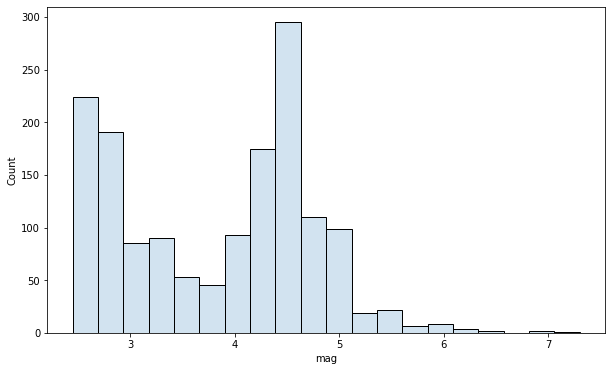

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='mag', data=df, alpha=0.2, bins=20)

### Identifikasi Kedalaman Sumber Gempa

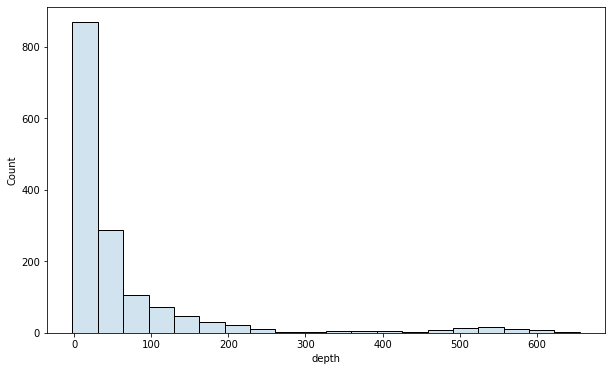

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='depth', data=df, alpha=0.2, bins=20)

### Persebaran Frekuensi Gempa Harian dengan Besar Magnitude

In [ ]:
doy['mag'] = df['mag']

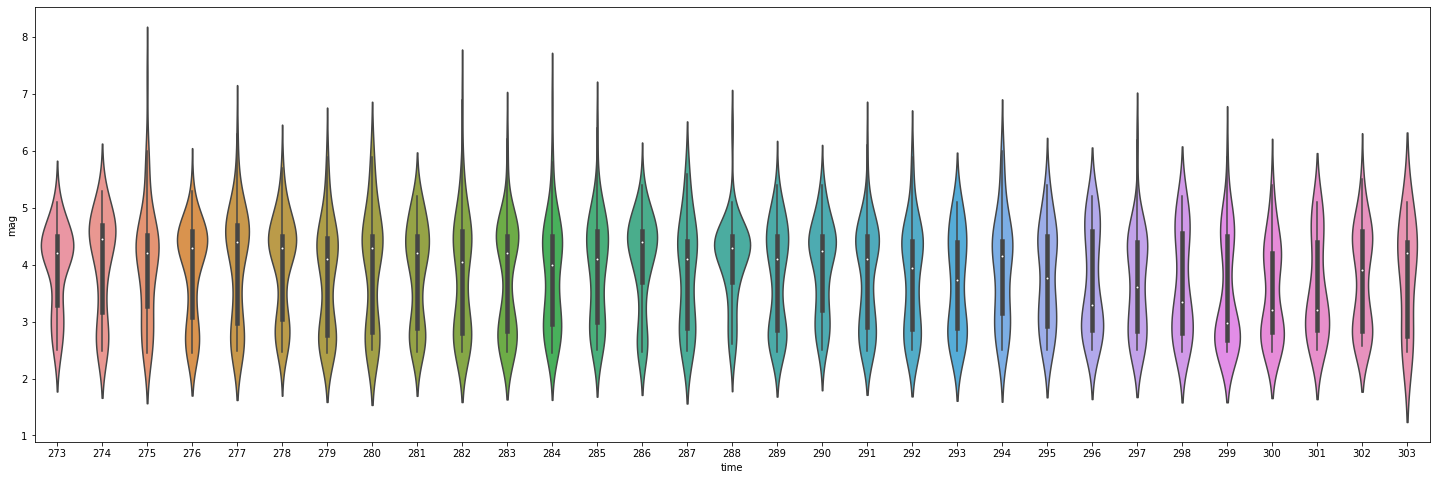

In [ ]:
plt.figure(figsize=(25,8))
sns.violinplot(x='time', y='mag', kind='scatter', data=doy)

### Identifikasi Frekuensi Terjadi Gempa dengan Histogram

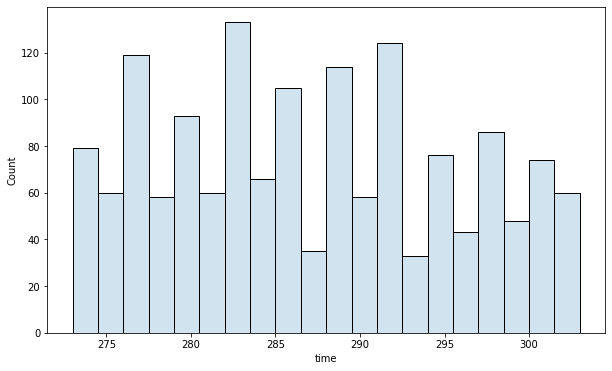

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='time',data=doy, alpha=0.2, bins=20)

### Identifikasi Jenis Gempa

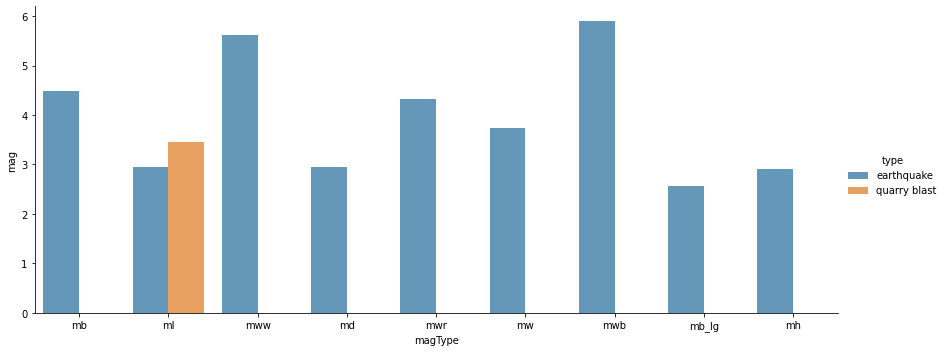

In [ ]:
sns.catplot(hue='type', y='mag', x='magType', data=df, kind='bar', aspect=19/8, alpha=0.75, ci=None)

### Lokasi Terjadi Gempa Seluruh Dunia

In [ ]:
map = fl.Map(location=(0,0), zoom_start=2)

In [ ]:
for i in range(len(df)):
  fl.Circle( location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']], radius=5 ).add_to(map)

In [ ]:
map

### Tambahkan Heatmap di Map

In [ ]:
from folium import plugins

heatmap_data = df[['latitude','longitude']].to_numpy()
map.add_children(plugins.HeatMap(heatmap_data, radius=15))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


## Kesimpulan

Dari beberapa output visual diatas dapat diambil ragam informasi seputar gempa bumi di dunia. Sebagai detailnya dari analisis visual diatas kita dapat mengambil indormasi berupa persebaran besar magnitude gempa, kedalaman sumber gempa, frekuansi terjadinya gempa harian dan dengan besar magnitudenya, identifikasi jenis gempa serta persebaran dan densitas lokasi terjadi gempa diseluruh dunia.